###**Denoising Autoencoder**

It is a kind of autoencoder in which we learn the robust representations from the reconstructed clear input obtained from the corrupted input image by adding the noise to the input image.

Noisy Image → Encoder → Latent Space → Decoder → Clean Image


**Steps used in this Algorithm:-**

1.  Import all the necessary Libraries

2.  Load the dataset

3.  Do Data Preprocessing and normalize the data

4.  Flatten Images

5.  Add Noise to Images

6.  Model Architecture and build the Denoising Autoencoder model

7.  Compile the Denoising Model

8.  Train   the Denoising Model

9.  Evaluate the  Denoising model

10.  Plot the accuracy vs loss

11.  Reconstruct Images Using the Trained Model

12.  Visualize Original vs Reconstructed Images

Encoder ----------> It plays an important role in compressing the input features

Decoder ----------> It plays an important role in reconstructing the original image

### Step 1:  Import all the necessary Libraries

In [132]:
import   numpy               as   np
import   pandas              as   pd
import   matplotlib.pyplot   as   plt
import   seaborn             as   sns

import   tensorflow          as   tf

from     tensorflow.keras.datasets   import        mnist
from     tensorflow.keras.models     import        Sequential
from     tensorflow.keras.layers     import        Dense, Dropout, BatchNormalization, Flatten, Reshape
from     tensorflow.keras.optimizers import        Adam

### **OBSERVATIONS:**

1.   pandas ------------> It is used for performing the data analysis and data manipulation tasks.

2.   numpy -------------> It is used for performing the mathematical operations in the Arrays.

3.   matplotlib ----------> It is used for performing the data visualization tasks.

4.   seaborn -----------> It is used to perform the data correlation among the variables.

5.   tensorflow ----------> It refers to the framework for building the neural network model.

6.   mnist ----------------> It is a dataset that represents the handwritten digits

7.   Sequential ----------> It can be defined as the linear stack of layers that can be placed one above the another.

8.   Flatten -----------> converts the vector into 1D vector

9.   Dense -------------> forms a dense connected neural network

10.  Adam -------------> optimizes the learning rate so as to increases the convergence speed.

### Step 2: Load the dataset

In [133]:
### Divide the dataset into the training and testing data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### **Input Data**

In [134]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [135]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [136]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (60000, 28, 28)
Shape of the input testing  data is: (10000, 28, 28)


###**OBSERVATIONS:**

1. The mnist handwritten digits dataset is loaded .

2. Then this dataset is divided into training and testing data

3. The input training data has 60000 input training labels with 28 * 28 pixels

4. The input testing  data has 10000 input testing labels with 28 * 28 pixels

5. In the Autoencoder, we have only inputs and no outputs as Autoencoder is an example of unsupervised learning.

### Step 3: Do Data Preprocessing and normalize the data

In [137]:
### Normalize the input pixel values

X_train = X_train.astype('float32')/255.0

X_test  = X_test.astype('float32')/255.0

In [138]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [139]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

###**OBSERVATIONS:**

1. After performing the normalization on the input pixel values, the pixel values get scaled from 0 to 255 till 0 to 1.

2. This normalization is performed because the neural network model can only work with the normlaized input data.

### Step 4: Flatten Images

In [140]:
### Flatten the input images

X_train.ndim

3

In [141]:
X_test.ndim

3

In [142]:
X_train.shape

(60000, 28, 28)

In [143]:
X_test.shape

(10000, 28, 28)

In [144]:
28 * 28

784

In [145]:
### Reshape the input images from 3D ----> 2D

X_train = X_train.reshape((len(X_train),784))

X_test  = X_test.reshape((len(X_test), 784))

In [146]:
X_train.ndim

2

In [147]:
X_train.shape

(60000, 784)

In [148]:
X_test.ndim

2

In [149]:
X_test.shape

(10000, 784)

In [150]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [151]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###**OBSERVATIONS:**

1.  Here all the input images are flattened from 3d ----> 2d as the autoencoder model expects the input image to be in the form of 2d.

### Step 5: Add Noise to Images

In [152]:
### Adding the noise to the input image

noise_factor = 0.5

### Adding the noise to the input training and testing data
X_train_noisy = X_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
X_test_noisy  = X_test  + noise_factor * np.random.normal(loc = 0.0, scale = 1.0 , size = X_test.shape)

In [153]:
X_train_noisy

array([[ 0.10764956, -0.86388099, -0.72377215, ...,  0.54295715,
        -0.13330901,  1.20548577],
       [-0.2371719 , -0.75119079,  0.43712487, ...,  0.50375331,
        -1.0984934 ,  0.18660675],
       [-0.31593032, -0.38224468, -0.18146438, ..., -0.8501036 ,
        -0.58504889, -0.20460193],
       ...,
       [ 0.40380946,  0.00719405, -0.13771167, ..., -0.69311989,
         0.30456688,  0.08085478],
       [-0.29427641,  0.41648291,  0.23088948, ...,  0.22600752,
        -0.8844454 ,  0.94791351],
       [ 0.1779214 ,  0.35747612, -0.27235473, ..., -0.18790615,
         0.08735144,  0.38900971]])

In [154]:
X_test_noisy

array([[-0.223509  , -0.2057945 , -0.76658671, ..., -0.38861508,
         0.14167637,  0.04463611],
       [ 0.04999065, -0.06262514,  0.02272339, ...,  0.0573901 ,
        -0.32936831, -0.17027435],
       [-1.06161015,  0.02631742, -0.15020226, ...,  0.54355611,
         0.9409632 ,  0.30625443],
       ...,
       [ 0.46548826, -0.56980485,  0.16540501, ...,  0.32482482,
        -0.51261315, -0.64232524],
       [ 0.05005284, -0.04008691,  0.58481841, ...,  0.5881947 ,
         0.08124582,  0.28962859],
       [-0.21588261, -0.04217631,  0.28659013, ..., -0.73402134,
         0.12847244, -0.07425877]])

In [155]:
X_train_noisy = np.clip(X_train_noisy,0.,1.)

X_test_noisy = np.clip(X_test_noisy,0.,1.)

In [156]:
X_train_noisy

array([[0.10764956, 0.        , 0.        , ..., 0.54295715, 0.        ,
        1.        ],
       [0.        , 0.        , 0.43712487, ..., 0.50375331, 0.        ,
        0.18660675],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.40380946, 0.00719405, 0.        , ..., 0.        , 0.30456688,
        0.08085478],
       [0.        , 0.41648291, 0.23088948, ..., 0.22600752, 0.        ,
        0.94791351],
       [0.1779214 , 0.35747612, 0.        , ..., 0.        , 0.08735144,
        0.38900971]])

In [157]:
X_test_noisy

array([[0.        , 0.        , 0.        , ..., 0.        , 0.14167637,
        0.04463611],
       [0.04999065, 0.        , 0.02272339, ..., 0.0573901 , 0.        ,
        0.        ],
       [0.        , 0.02631742, 0.        , ..., 0.54355611, 0.9409632 ,
        0.30625443],
       ...,
       [0.46548826, 0.        , 0.16540501, ..., 0.32482482, 0.        ,
        0.        ],
       [0.05005284, 0.        , 0.58481841, ..., 0.5881947 , 0.08124582,
        0.28962859],
       [0.        , 0.        , 0.28659013, ..., 0.        , 0.12847244,
        0.        ]])

###**OBSERVATIONS:**

1. We have added the noise to the original input and make it as the corrupted input image.

2. Then  we have scaled all the corrupted input image in the range of 0 to 1.

### Step 6: Model Architecture and build the Denoising Autoencoder model

In [158]:
### Construct the Denoising Autoencoder model

denoising_autoencoder_model  = Sequential([
    ### perform the encoding process
    Dense(128,activation='relu',input_shape=(784,))                                ,
    Dense(64, activation='relu')                                                   ,

    Dense(128, activation='relu')                                                  ,
    Dense(784, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


OBSERVATIONS:


1.  The object for the deoising autoencoder sequential model has been initialized.

2.  First of all we have the total input features as 784

3.  Then we compress 784 features ------> 128 features

4.  Again we compress 128 features -------> 64 features

5.  The above process is known as encoding.

6.  Then begins with the decoding process

7.  We decode the features from 64 --------------> 128 features

8.  Again we decode from 128 ---------------------> 784 features

9.  This process is known as decoding

So here in this model, we try to compress the size of the corrupted input image   so as to extract all the essential information from it and then we contruct the original image from the corrupted input image.

In [159]:
### get the summary of the model

denoising_autoencoder_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

### Step 7: Compile the Denoising Model

In [160]:
### Compile the model

denoising_autoencoder_model.compile(
    optimizer        =           'adam'                       ,
    loss             =           'binary_crossentropy'        ,
    metrics          =           ['accuracy']
)

### **OBSERVATIONS:**

1.   The model has been made ready for the training purpose with the help of the following parameters.

(a.) optimizer = 'adam' . It is used to make the learning rate as dynamic and improves the convergence speed.

(b.) loss = 'binary_crossentropy'. It is a binary loss function as it is used to solve the binary classification problem.

(c.) metrics = 'accuracy'. It is used to evaluate the performance of the model.

### Step 8: Train   the Denoising Model

In [161]:
history = denoising_autoencoder_model.fit(
    X_train_noisy                                                 ,                   ### Corrupted noisy input
    X_train                                                       ,                   ### clean original input
    epochs          =           10                                ,
    batch_size      =           256                               ,
    validation_data =           (X_test_noisy, X_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.0078 - loss: 0.3226 - val_accuracy: 0.0079 - val_loss: 0.1793
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0108 - loss: 0.1718 - val_accuracy: 0.0092 - val_loss: 0.1524
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0102 - loss: 0.1503 - val_accuracy: 0.0093 - val_loss: 0.1406
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.0105 - loss: 0.1399 - val_accuracy: 0.0102 - val_loss: 0.1341
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0108 - loss: 0.1336 - val_accuracy: 0.0105 - val_loss: 0.1297
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0117 - loss: 0.1300 - val_accuracy: 0.0116 - val_loss: 0.1271
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0119 - loss: 0.1274 - val_accuracy: 0.0122 - val_loss: 0.1245
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0117 - loss: 0.1250 - val_accu

### **OBSERVATIONS:**

1.  The denoising autoencoder model has been trained with the help of the following parameters:-

(a.) training data ----------------> X_train, X_train_noisy

    .   X_train_noisy ------->  Corrupted input image     (input)

    .   X_train       -------> Original clean input image  (output)

It has the corrupted image as the input, performs the encoding and then reconstructs the original image from it as the output.

Then the reconstructed image is compared with the original image.

(b.) epochs = 10 ------------> 10 iterations are needed to train the model

(c.) batch_size = 256 -------> the weights get updated after every 256 samples

(d.) validation_data --------> Input test data is X_test_noisy, Output_test_data is X_test

### Step 9: Evaluate the  Denoising model

In [162]:
loss, acc = denoising_autoencoder_model.evaluate(X_test_noisy, X_test)

print("Loss value of the model is:", loss)

print("Accuracy of the model is:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0106 - loss: 0.1208
Loss value of the model is: 0.11985822767019272
Accuracy of the model is: 0.010599999688565731


### Step 10: Plot the accuracy vs loss

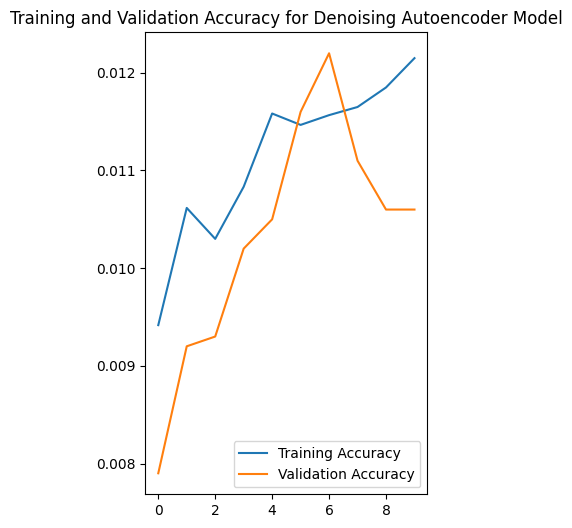

In [163]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy for Denoising Autoencoder Model')
plt.legend()
plt.show()

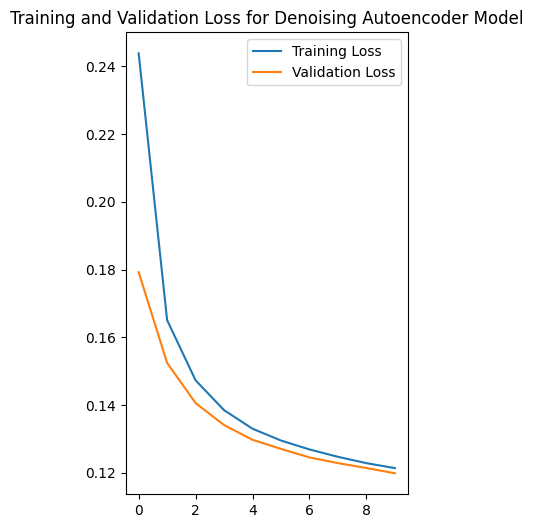

In [164]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss for Denoising Autoencoder Model')
plt.legend()
plt.show()

### **OBSERVATIONS:**

1.  This code visualizes model performance after training using the history objects of both the models for the Accuracy and loss.

2.  It depicts about the training and Validation accuracy as well as for loss and Validation loss.

### Step 11:  Reconstruct Images Using the Trained Model

In [165]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [166]:
decoded_imgs = denoising_autoencoder_model.predict(X_test_noisy)  ### predict based on the corrupted input image

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [167]:
decoded_imgs

array([[5.2745580e-08, 2.3030849e-07, 2.5776924e-07, ..., 3.4215438e-07,
        4.3114188e-08, 4.0713732e-07],
       [3.1781261e-07, 5.8524017e-07, 1.2852767e-07, ..., 1.8459062e-07,
        1.3028118e-07, 6.9528329e-07],
       [1.3815818e-06, 3.3845626e-07, 2.3680940e-07, ..., 6.5476928e-07,
        2.2680408e-07, 2.4901578e-07],
       ...,
       [2.8522631e-08, 4.1252821e-07, 1.6216406e-08, ..., 7.4472325e-08,
        3.9752759e-08, 2.5968667e-08],
       [2.9507225e-08, 3.3202613e-07, 4.8496137e-08, ..., 2.8913973e-07,
        1.7918796e-07, 1.2727645e-07],
       [6.4591958e-08, 9.6179394e-07, 6.9823379e-08, ..., 2.5695513e-07,
        1.0774310e-07, 5.0708582e-08]], dtype=float32)

### Step 12: Visualize Original vs Reconstructed Images

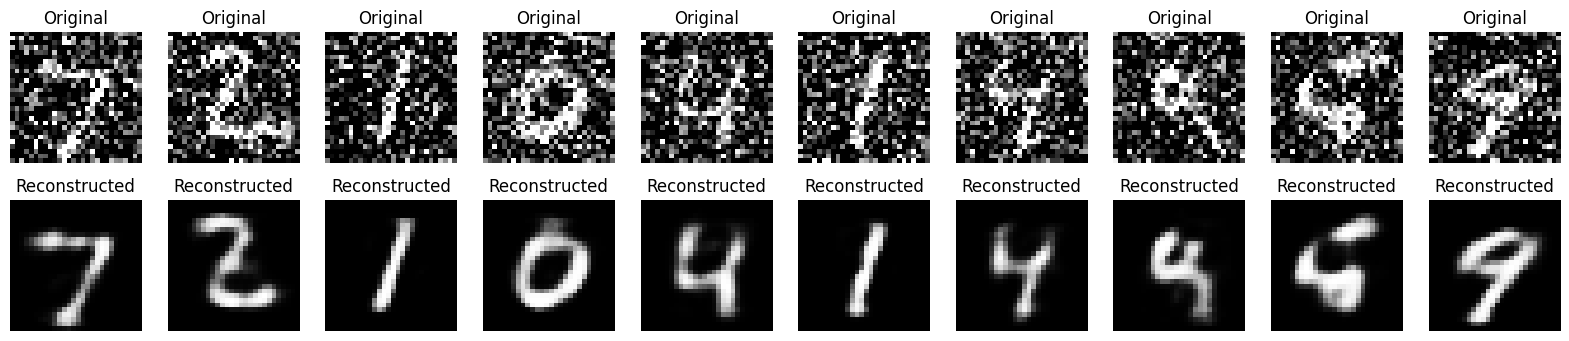

In [168]:

n = 10  # Show 10 images
plt.figure(figsize=(20,4))

for i in range(n):
    # Display original corrupted noisy input image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    plt.axis("off")

    # Display reconstructed input clean image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstructed")
    plt.axis("off")

plt.show()

### **OBSERVATIONS:**

1.    Here we have performed the visualization between the Original image vs Reconstructed image.

2.    We have made the comparision between the two and came to the conclusion that both the images looks the same.

3.   So the Autoencoder is working fine.